
Se monta Google Drive personal donde están los datasets alojados. Así no se pierden cuando expire la sesión

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Se importan paquetes y librerías necesarias para el análisis descriptivo de N-Gramas y el cálculo de TF-IDF

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# **NUBES DE PALABRAS**

Se cargan los dataset de Apple y Tesla limpios

In [ ]:
data_apple = pd.read_csv('drive/MyDrive/TFG ADE/Data_Apple_Limpio.csv')
data_tesla = pd.read_csv('drive/MyDrive/TFG ADE/Data_Tesla_Limpio.csv')

Se genera la nube de palabras con la librería Wordcloud para obtener de forma visual los términos más repetidos. El procedimiento es el siguiente:
1. Se combinan los textos de todos los tweets en un string único
2. Se seleccionan las stop words en inglés, incluyendo las menciones a las propias empresas
3. Se instancia el objeto Wordcloud
4. Se visualiza el objeto Wordcloud

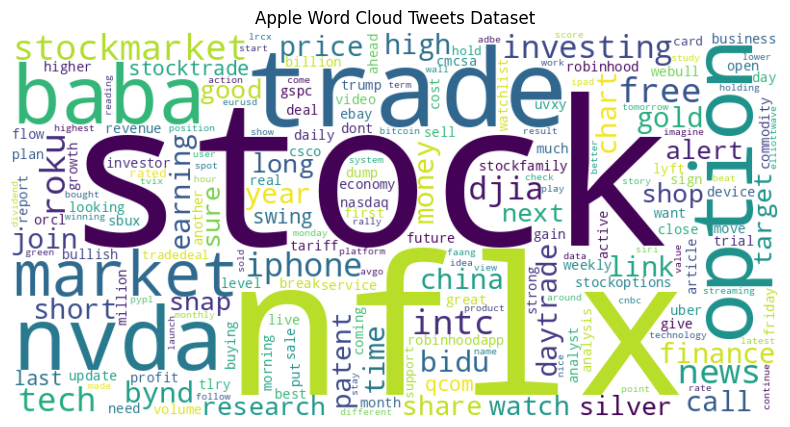

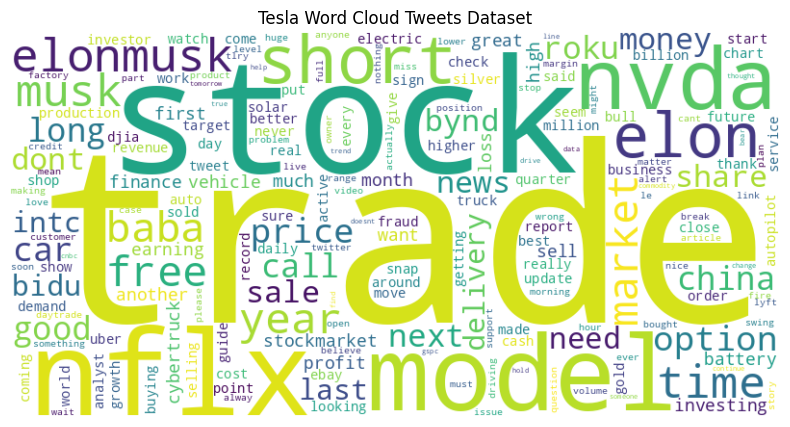

In [ ]:

# Combine the text of all tweets into a single string
text_a = ' '.join(data_apple['body'].astype(str))
text_t = ' '.join(data_tesla['body'].astype(str))

#stop words palabras relacionadas con las empresas
stop_words = set(stopwords.words('english'))
stop_words.update(['tsla', 'tesla', 'tslaq', 'amzn', 'aapl', 'twtr','see','goog', 'googl', 'msft','today','people','right','back','well','still','even','also','apple','amazon','get','like','one','already','thing','think','could','would','going','got','microsoft','google','look','since','maybe','yet','got','yesterday','week','company','know','say','way','u','many','lol','make','take','tab','keep','number','may','thats'])


# Create a WordCloud object
wordcloud_a = WordCloud(width=800, height=400, background_color='white',collocations=False, stopwords=stop_words).generate(text_a)
wordcloud_t = WordCloud(width=800, height=400, background_color='white',collocations=False, stopwords=stop_words).generate(text_t)

# Generate the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis("off")
plt.title("Apple Word Cloud Tweets Dataset")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_t, interpolation='bilinear')
plt.axis("off")
plt.title("Tesla Word Cloud Tweets Dataset")
plt.show()

# **ANÁLISIS N-GRAMAS**

## **CONJUNTO APPLE**

Se calculan los unigramas, bigramas y trigramas más relevantes del conjunto de tweets a partir de la puntuación calculada por el algoritmo TF-IDF

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords=['tsla', 'tesla', 'tslaq', 'amzn', 'aapl', 'twtr','see','goog', 'googl', 'msft','today','people','right','back','well','still','even','also','apple','amazon','get','like','one','already','thing','think','could','would','going','got','microsoft','google','look','since','maybe','yet','got','yesterday','week','day','year', 'within','whatever']


#APPLE
#### TF-IDF calculation UNIGRAMAS
tfidf_vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 1), stop_words=stopwords)
unigram_tfidf = tfidf_vectorizer.fit_transform(data_apple['body'])
names=tfidf_vectorizer.get_feature_names_out()
freqs = unigram_tfidf.sum(axis=0).A1
result= dict(zip(names, freqs))

# Obtenemos las 30 palabras más importantes aplicando TF-IF
from operator import itemgetter
i = 0
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
df_results=pd.DataFrame.from_dict(results_sorted).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results[0],df_results[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Unigramas más relevantes del corpus sobre Apple')

#### TF-IDF calculation BIGRAMAS
#Esta es la función TF-IDF para los bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2),stop_words=stopwords)
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(data_apple['body'])
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus sobre Apple')

#Esta es la función TF-IDF para los trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3),stop_words=stopwords)
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(data_apple['body'])
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus sobre Apple')

## **CONJUNTO TESLA**

In [ ]:
#TESLA
#### TF-IDF calculation UNIGRAMAS


# Create a NumPy function to apply replacements
#replace_func = np.vectorize(lambda x: ' '.join(replacements.get(word, word) for word in x.split()))

tfidf_vectorizer = TfidfVectorizer(max_features=20, ngram_range=(1, 1), stop_words=stopwords)
unigram_tfidf = tfidf_vectorizer.fit_transform(data_tesla['body'])
names=tfidf_vectorizer.get_feature_names_out()
freqs = unigram_tfidf.sum(axis=0).A1
result= dict(zip(names, freqs))

# Obtenemos las 30 palabras más importantes aplicando TF-IF
from operator import itemgetter
i = 0
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
df_results=pd.DataFrame.from_dict(results_sorted).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results[0],df_results[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Unigramas más relevantes del corpus sobre Tesla')

#### TF-IDF calculation BIGRAMAS
#Esta es la función TF-IDF para los bigramas
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2),stop_words=stopwords)
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(data_tesla['body'])
names_bi=tfIdfVectorizer_bi.get_feature_names_out()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus sobre Tesla')

#Esta es la función TF-IDF para los trigramas
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3),stop_words=stopwords)
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(data_tesla['body'])
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

#Le pedimos que nos muestre los resultados y nos los plotee adecuadamente
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus sobre Tesla')